In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import viz

COLORS, PAGE_WIDTH, ROW_HEIGHT = viz.set_plots()

In [48]:
def rolling_mean(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def rolling_min(data, window_size):
    return np.array([np.min(data[i:i+window_size]) for i in range(len(data) - window_size + 1)])

def rolling_max(data, window_size):
    return np.array([np.max(data[i:i+window_size]) for i in range(len(data) - window_size + 1)])

In [49]:
dqn_rewards = np.load('DQNResults/dqn_rewards.npy')
pg_rewards = np.load('PGResults/pg_rewards.npy')
ppo_rewards = np.load('PPOResults/ppo_rewards.npy')
sac_rewards = np.load('SACResults/sac_rewards.npy')

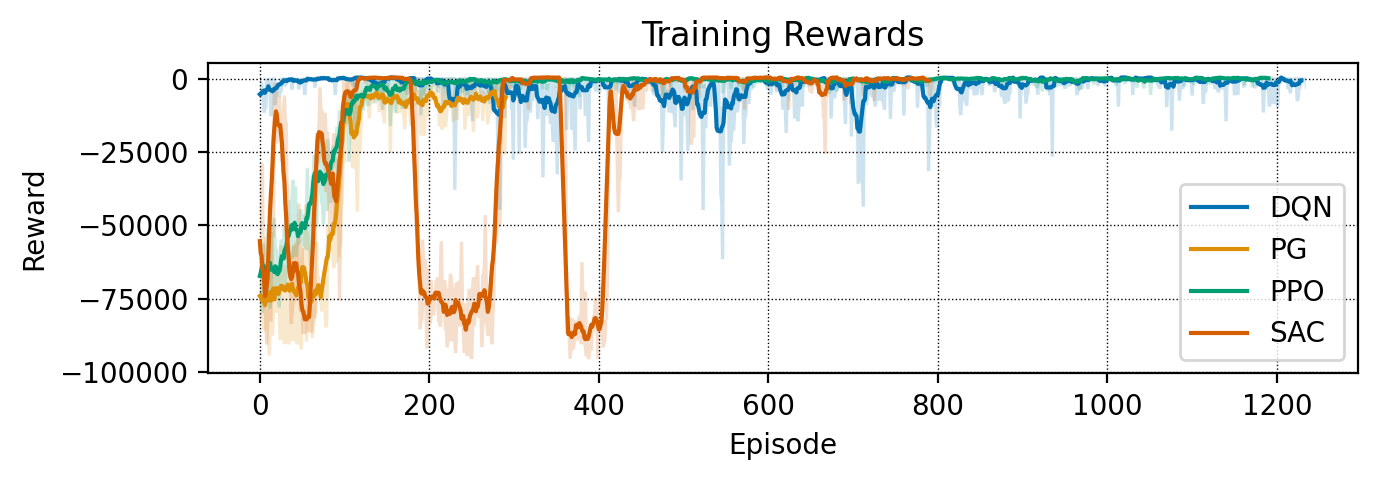

In [50]:
window_size_min_max = 5
window_size_mean = 10

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))

ax.plot(rolling_mean(dqn_rewards, window_size_mean), label='DQN')
ax.fill_between(range(len(rolling_min(dqn_rewards, window_size_min_max))), rolling_min(dqn_rewards, window_size_min_max), rolling_max(dqn_rewards, window_size_min_max), alpha=0.2)
ax.plot(rolling_mean(pg_rewards, window_size_mean), label='PG')
ax.fill_between(range(len(rolling_min(pg_rewards, window_size_min_max))), rolling_min(pg_rewards, window_size_min_max), rolling_max(pg_rewards, window_size_min_max), alpha=0.2)
ax.plot(rolling_mean(ppo_rewards, window_size_mean), label='PPO')
ax.fill_between(range(len(rolling_min(ppo_rewards, window_size_min_max))), rolling_min(ppo_rewards, window_size_min_max), rolling_max(ppo_rewards, window_size_min_max), alpha=0.2)
ax.plot(rolling_mean(sac_rewards, window_size_mean), label='SAC')
ax.fill_between(range(len(rolling_min(sac_rewards, window_size_min_max))), rolling_min(sac_rewards, window_size_min_max), rolling_max(sac_rewards, window_size_min_max), alpha=0.2)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.set_title('Training Rewards')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()
